In [869]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [870]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

In [871]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [872]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                    'hours-per-week', 'native-country', 'income']

In [873]:
#df['income'] = df['income'].apply(lambda x: 0 if x=='<=50K' else 1)

In [874]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [876]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [877]:
#separando dados de treino e dados de teste

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [878]:
df_train = df_train.replace('?', np.nan)
df_test = df_test.replace('?', np.nan)

In [879]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [880]:
#separate target and features on test

#df_test = df_test.drop('income', axis=1)


In [881]:
df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
24639,20,Private,385077,12th,8,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
5514,21,State-gov,140764,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,12,United-States,<=50K
19777,64,Private,312242,Some-college,10,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,3,United-States,<=50K
10781,26,Private,227489,HS-grad,9,Never-married,Tech-support,Other-relative,Black,Male,0,0,40,?,<=50K
32239,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,35,Private,109351,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,8614,0,45,United-States,>50K
5390,31,Private,101562,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,55,United-States,<=50K
860,43,Private,191547,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,Mexico,<=50K
15795,21,Private,223352,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,1055,0,30,United-States,<=50K


In [882]:
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14160,38,Private,680390,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,20,United-States,<=50K
27047,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28867,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,51,Private,306108,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,>50K
7827,46,Private,124071,Masters,14,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,44,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307,45,Private,88500,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,44,United-States,>50K
1338,38,State-gov,34180,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
24534,17,Private,193748,11th,7,Never-married,Sales,Own-child,White,Male,0,0,15,United-States,<=50K
18080,31,Private,192900,Some-college,10,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [883]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26033 entries, 24639 to 23654
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26033 non-null  int64 
 1   workclass       26033 non-null  object
 2   fnlwgt          26033 non-null  int64 
 3   education       26033 non-null  object
 4   education-num   26033 non-null  int64 
 5   marital-status  26033 non-null  object
 6   occupation      26033 non-null  object
 7   relationship    26033 non-null  object
 8   race            26033 non-null  object
 9   sex             26033 non-null  object
 10  capital-gain    26033 non-null  int64 
 11  capital-loss    26033 non-null  int64 
 12  hours-per-week  26033 non-null  int64 
 13  native-country  26033 non-null  object
 14  income          26033 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.2+ MB


In [884]:
#verifying missing data

df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [885]:
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,26033.000000,2.603300e+04,26033.000000,26033.000000,26033.000000,26033.000000
mean,38.566435,1.895684e+05,10.069834,1057.673338,87.379211,40.454961
std,13.656362,1.058929e+05,2.563372,7293.305006,402.613893,12.357658
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177890e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.780740e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.363910e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [886]:
import matplotlib.pyplot as plt
import seaborn as sns

In [887]:
df_analysis = df_train.copy()
df_analysist = df_test.copy()

In [888]:
# Importando o LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instanciando o LabelEncoder
le = LabelEncoder()

# Modificando o nosso dataframe, transformando a variável de classe em 0s e 1s
df_analysis['income'] = le.fit_transform(df_analysis['income'])
df_train['income'] = le.fit_transform(df_analysis['income'])
df_test['income'] = le.fit_transform(df_analysist['income'])

In [889]:
df_analysis['income']

24639    0
5514     0
19777    0
10781    0
32239    0
        ..
29802    1
5390     0
860      0
15795    0
23654    0
Name: income, Length: 26033, dtype: int32

In [890]:
df_train['income']

24639    0
5514     0
19777    0
10781    0
32239    0
        ..
29802    1
5390     0
860      0
15795    0
23654    0
Name: income, Length: 26033, dtype: int64

In [891]:
df_test['income']

14160    0
27047    0
28867    1
5667     1
7827     0
        ..
13307    1
1338     0
24534    0
18080    0
10354    1
Name: income, Length: 6512, dtype: int32

C:\Users\jeean\AppData\Local\Temp\ipykernel_24372\3637185762.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_analysis.corr(), dtype=np.bool))
C:\Users\jeean\AppData\Local\Temp\ipykernel_24372\3637185762.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_analysis.corr(), dtype=np.bool))
C:\Users\jeean\AppData\Local\Temp\ipykernel_24372\3637185762.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated.

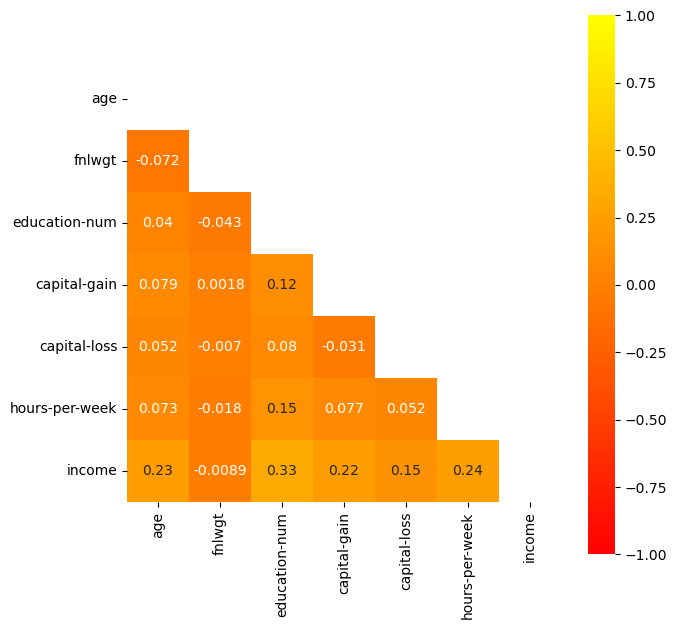

In [892]:
#Construindo o heatmap (analísar correlações das variáveis)

mask = np.triu(np.ones_like(df_analysis.corr(), dtype=np.bool))

plt.figure(figsize=(7,7))

sns.heatmap(df_analysis.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1, cmap='autumn')
plt.show()

C:\Users\jeean\AppData\Local\Temp\ipykernel_24372\2279205684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_analysis['age']);


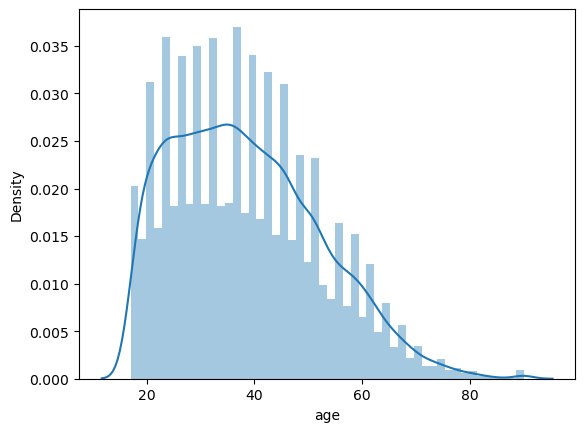

In [893]:
#visulizando variáveis numéricas

sns.distplot(df_analysis['age']);

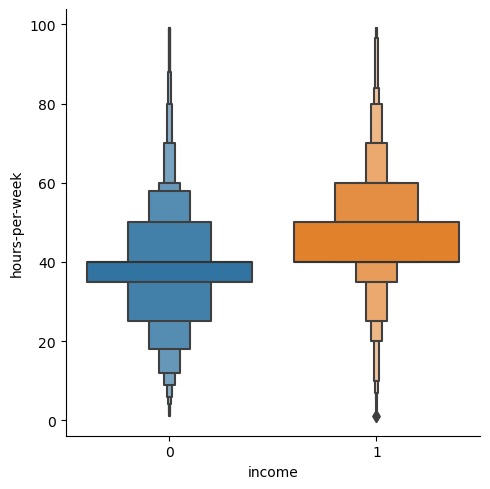

In [894]:
sns.catplot(x="income", y="hours-per-week", kind="boxen", data=df_analysis);

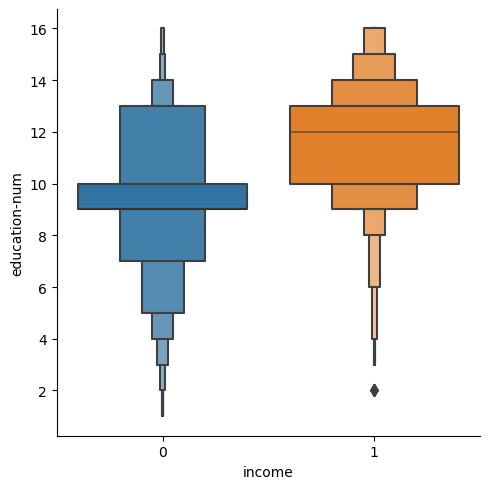

In [895]:
sns.catplot(x="income", y="education-num", kind="boxen", data=df_analysis);

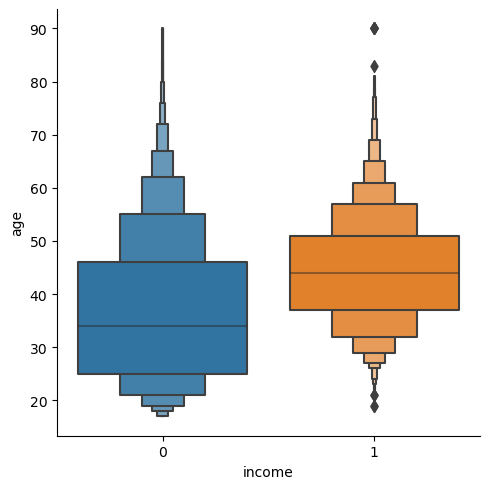

In [896]:
sns.catplot(x="income", y="age", kind="boxen", data=df_analysis);

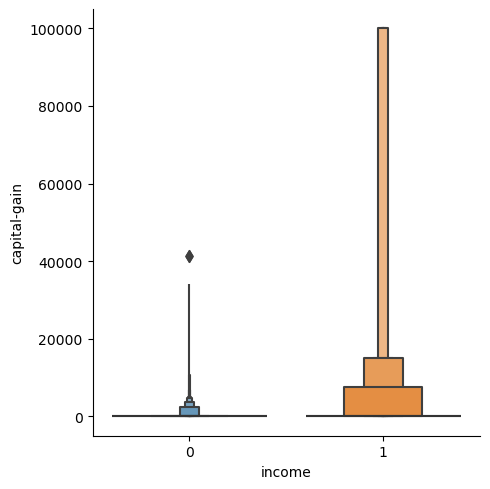

In [897]:
sns.catplot(x="income", y="capital-gain", kind="boxen", data=df_analysis);

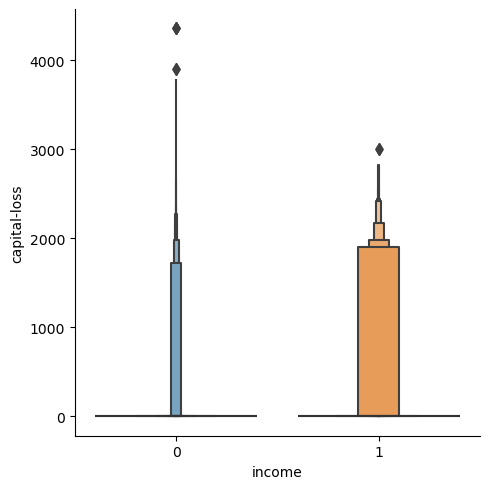

In [898]:
sns.catplot(x="income", y="capital-loss", kind="boxen", data=df_analysis);

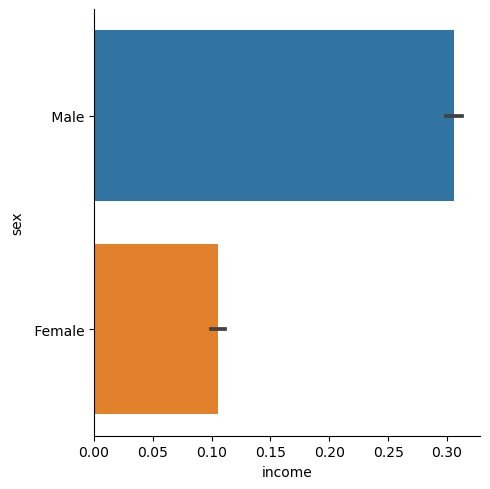

In [899]:
#visualizando variáveis categóricas

sns.catplot(y="sex", x="income", kind="bar", data=df_analysis);

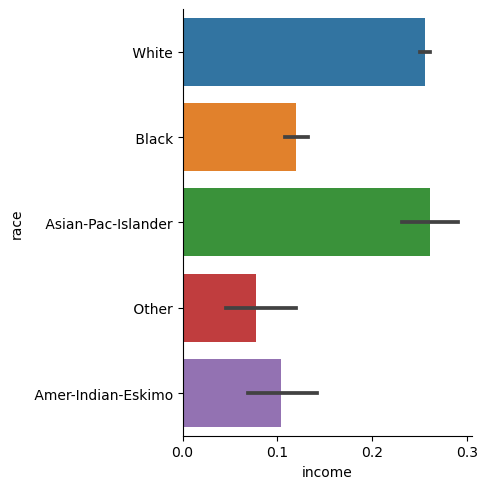

In [900]:
sns.catplot(y="race", x="income", kind="bar", data=df_analysis);

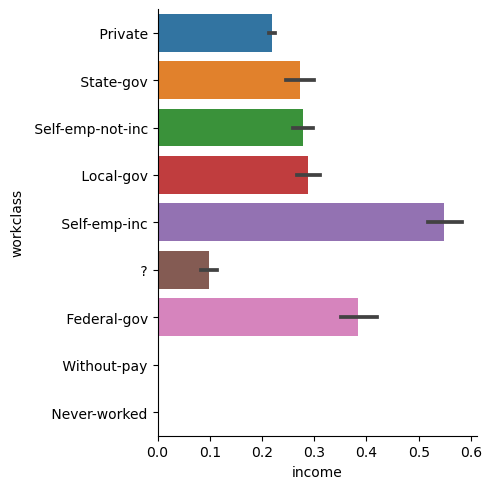

In [901]:
sns.catplot(y="workclass", x="income", kind="bar", data=df_analysis);

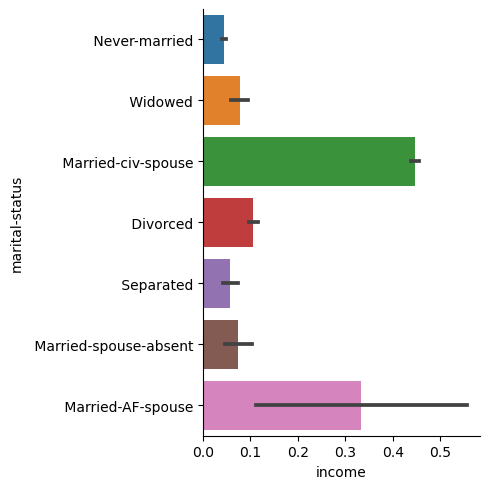

In [902]:
sns.catplot(y="marital-status", x="income", kind="bar", data=df_analysis);

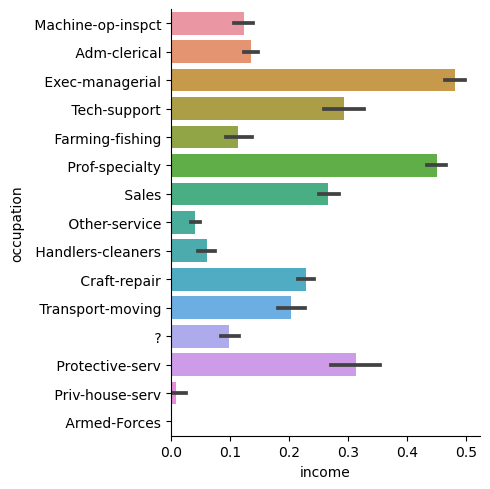

In [903]:
sns.catplot(y="occupation", x="income", kind="bar", data=df_analysis);

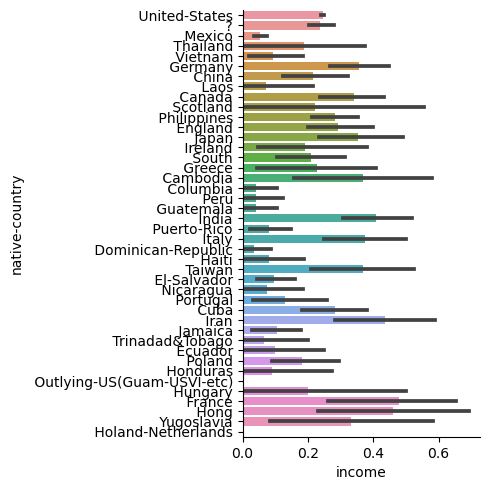

In [904]:
sns.catplot(y="native-country", x="income", kind="bar", data=df_analysis);

In [905]:
df_analysis["native-country"].value_counts()

 United-States                 23314
 Mexico                          522
 ?                               455
 Philippines                     156
 Germany                         109
 Canada                           97
 El-Salvador                      94
 Puerto-Rico                      87
 India                            81
 England                          75
 Cuba                             71
 Jamaica                          67
 South                            67
 China                            65
 Dominican-Republic               57
 Italy                            56
 Vietnam                          54
 Japan                            51
 Columbia                         48
 Guatemala                        48
 Poland                           44
 Iran                             39
 Taiwan                           38
 Haiti                            37
 Portugal                         31
 Nicaragua                        27
 Peru                             24
 

In [906]:
#dados faltantes (numéricos)
#from sklearn.impute import KNNImputer

# Cria o KNNImputer com 5 vizinhos
#knn_imputer = KNNImputer(n_neighbors=5)

In [907]:
# Cria o array com dados faltantes
#array = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]

# Preenche os dados faltantes
#new_array = knn_imputer.fit_transform(array)

#new_array

In [908]:
#normalization
#from sklearn.preprocessing import StandardScaler

# Cria o nosso StandardScaler
#scaler = StandardScaler()

In [909]:
# Cria um array numérico
#array = [[-3, 0], [0, 0], [3, 1], [0, 1]]

# Normaliza nosso array
#new_array = scaler.fit_transform(array)

#new_array

In [910]:
# Cria a nossa pipeline numérica
#from sklearn.pipeline import Pipeline

#numerical_pipeline = Pipeline(steps = 
 #   [('imputer', KNNImputer(n_neighbors=10, weights="uniform")), 
  #   ('scaler', StandardScaler())
#])

In [911]:
#Limpeza de dados 

#Features desnecessárias

df_train = df_train.drop(['fnlwgt', 'native-country', 'education'], axis=1)
df_test = df_test.drop(['fnlwgt', 'native-country', 'education'], axis=1)

In [912]:
df_test.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
14160,38,Private,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,20,0
27047,45,State-gov,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,0
28867,29,Private,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,1
5667,51,Private,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,1
7827,46,Private,14,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,44,0


In [913]:
X_train = df_train.iloc[:, df_train.columns != 'income']
y_train = df_train.iloc[:, df_train.columns == 'income']
X_test = df_test.iloc[:, df_test.columns != 'income']
y_test = df_test.iloc[:, df_test.columns == 'income']

In [914]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6512 entries, 14160 to 10354
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   income  6512 non-null   int32
dtypes: int32(1)
memory usage: 76.3 KB


In [915]:
#Pré-processamento: separar os dados categóricos, dados esparsos e dados numéricos

# Seleciona as variáveis numéricas
numerical_cols = list(X_train.select_dtypes(include=[np.number]).columns.values)

# Remove as variáveis numéricas esparsas
numerical_cols.remove('capital-gain')
numerical_cols.remove('capital-loss')

# Seleciona as variáveis numéricas esparsas
sparse_cols = ['capital-gain', 'capital-loss']

# Seleciona as variáveis categóricas
categorical_cols = list(X_train.select_dtypes(exclude=[np.number]).columns.values)

# Mostrando as diferentes seleções
print("Colunas numéricas: ", numerical_cols)
print("Colunas esparsas: ", sparse_cols)
print("Colunas categóricas: ", categorical_cols)

Colunas numéricas:  ['age', 'education-num', 'hours-per-week']
Colunas esparsas:  ['capital-gain', 'capital-loss']
Colunas categóricas:  ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']


In [916]:
#preencher os dados faltantes

from sklearn.impute import SimpleImputer

# Inicializa nosso Imputer
simple_imputer = SimpleImputer(strategy='most_frequent')

In [917]:
# Cria um array com um dado faltante 
array = np.array([["Female"],
         ["Male"],
         [np.nan],
         ["Female"]], dtype=object)

# Preenche o dado faltante com o Imputer
new_array = simple_imputer.fit_transform(array)

print(new_array)

[['Female']
 ['Male']
 ['Female']
 ['Female']]


In [918]:
#fazer um onehotEncoder

from sklearn.preprocessing import OneHotEncoder

# Inicializa nosso Encoder
one_hot = OneHotEncoder(sparse=False)

In [919]:
# Cria um array com dados categóricos
array = np.array([["Female"],
         ["Male"],
         ["Female"],
         ["Female"]], dtype=object)

# Transforma o nosso array
new_array = one_hot.fit_transform(array)

new_array

C:\Users\jeean\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [920]:
#criando um Pipeline -> repete os passos anteriores

from sklearn.pipeline import Pipeline

# Cria a nossa pipeline categórica
categorical_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(drop='if_binary'))
])

In [921]:
#Agora, podemos usar essa Pipeline para aplicar os dois passos anteriores com apenas um fit_transform:

# Cria um array com dados categóricos
array = np.array([["Female"],
         ["Male"],
         [np.nan],
         ["Female"]], dtype=object)

# Transforma o nosso array
new_array = categorical_pipeline.fit_transform(array)

In [922]:
#Tratando as variáveis numéricas

#preencher os dados faltantes com a lógica KNN

from sklearn.impute import KNNImputer

# Cria o nosso KNNImputer com 5 vizinhos
knn_imputer = KNNImputer(n_neighbors=5)

In [923]:
# Cria o nosso array com dados faltantes
array = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]

# Preenche os dados faltantes
new_array = knn_imputer.fit_transform(array)

new_array

array([[1., 2., 5.],
       [3., 4., 3.],
       [4., 6., 5.],
       [8., 8., 7.]])

In [924]:
#Normalizando as features -> function StandarScaler

from sklearn.preprocessing import StandardScaler

# Cria o nosso StandardScaler
scaler = StandardScaler()

In [925]:
# Cria um array numérico
array = [[-3, 0], [0, 0], [3, 1], [0, 1]]

# Normaliza nosso array
new_array = scaler.fit_transform(array)

new_array

array([[-1.41421356, -1.        ],
       [ 0.        , -1.        ],
       [ 1.41421356,  1.        ],
       [ 0.        ,  1.        ]])

In [926]:
# Cria a nossa pipeline numérica
numerical_pipeline = Pipeline(steps = [
    ('imputer', KNNImputer(n_neighbors=10, weights="uniform")),
    ('scaler', StandardScaler())
])

In [927]:
#tratando dados numéricos esparsos

from sklearn.preprocessing import RobustScaler

sparse_pipeline = Pipeline(steps = [
    ('imputer', KNNImputer(n_neighbors=10, weights="uniform")),
    ('scaler', RobustScaler())
])

In [928]:
#juntando tudo 

from sklearn.compose import ColumnTransformer

# Cria o nosso Pré-Processador

# Cada pipeline está associada a suas respectivas colunas no datast
preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_pipeline, numerical_cols),
    ('spr', sparse_pipeline, sparse_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

In [929]:
X_train = preprocessor.fit_transform(X_train)

In [930]:
#finally, KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

k_range = np.arange(14,31,2)
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train.values.ravel())

print(grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 18}


In [931]:
accuracy = grid_search.best_score_ *100
print("Accuracy: {:.2f}%".format(accuracy) )

Accuracy: 86.74%


In [932]:
# Regressão Logística

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

logistic_regression = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(logistic_regression, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print("Accuracy: %.3f (%.3f)" % (np.mean(scores)*100, np.std(scores)))

Accuracy: 84.740 (0.006)


In [933]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std

model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores)*100, std(n_scores)))

Accuracy: 84.786 (0.006)


In [934]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(decision_tree, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print("Accuracy: %.3f (%.3f)" % (np.mean(scores)*100, np.std(scores)))

Accuracy: 81.993 (0.008)


In [935]:
# Data Prep dados de teste

X_test

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
14160,38,Private,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,20
27047,45,State-gov,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40
28867,29,Private,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55
5667,51,Private,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40
7827,46,Private,14,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,44
...,...,...,...,...,...,...,...,...,...,...,...
13307,45,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,44
1338,38,State-gov,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40
24534,17,Private,7,Never-married,Sales,Own-child,White,Male,0,0,15
18080,31,Private,10,Never-married,Other-service,Not-in-family,White,Male,0,0,40


In [936]:
X_test = preprocessor.fit_transform(X_test)

In [937]:
#KNN prediction

In [938]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=18)

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
          'f1' : 'f1_macro'}
scores = cross_validate(knn, X_train, y_train.values.ravel(), scoring=scoring, cv=5)

In [939]:
print('Average Accuracy in CV: {:.2f} \n'.format(scores['test_acc'].mean()))
print('Average Precision in CV: {:.2f} \n'.format(scores['test_prec_macro'].mean()))
print('Average Recall in CV: {:.2f} \n'.format(scores['test_rec_macro'].mean()))
print('Average F-1 in CV: {:.2f} \n'.format(scores['test_f1'].mean()))

Average Accuracy in CV: 0.87 

Average Precision in CV: 0.83 

Average Recall in CV: 0.79 

Average F-1 in CV: 0.81 



In [940]:
knn.fit(X_train,y_train.values.ravel())

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)

Accuracy: 0.8642506142506142
Recall: 0.65
Precision: 0.7624633431085044
